### Target Customer Compass: Segmentation for Retail Businesses

    Designed a customer segmentation model to enhance retail marketing strategies by categorizing customers based on purchasing behavior, demographics, and preferences. Leveraged advanced data analytics and clustering techniques to identify distinct customer groups, providing actionable insights for tailored marketing campaigns, improved customer engagement, and optimized product offerings. The model helps retailers better understand their customer base and make data-driven decisions to boost sales and customer satisfaction.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Step 1: Load the Dataset
# Load the CSV file that was uploaded
customer_data = pd.read_csv('CustomerSegmentationdevashish.csv')
customer_data

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,1/21/2022 6:27,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,3/1/2023 13:01,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,3/21/2024 15:37,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,10/31/2020 9:59,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,12/10/2020 0:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,3/27/2023 6:12,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,5/19/2022 5:13,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,9/3/2021 13:59,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,10/17/2023 5:50,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)


In [18]:
# Step 2: Data Cleaning and Preprocessing
# Convert the 'Date' column from string to datetime format
customer_data['Date'] = pd.to_datetime(customer_data['Date'], format='%m/%d/%Y %H:%M')
print(customer_data['Date'] )



0        2022-01-21 06:27:00
1        2023-03-01 13:01:00
2        2024-03-21 15:37:00
3        2020-10-31 09:59:00
4        2020-12-10 00:59:00
                 ...        
999995   2023-03-27 06:12:00
999996   2022-05-19 05:13:00
999997   2021-09-03 13:59:00
999998   2023-10-17 05:50:00
999999   2020-06-15 11:58:00
Name: Date, Length: 1000000, dtype: datetime64[ns]

In [48]:
# Extract new features from 'date_time'
customer_data['hour'] =customer_data['Date'].dt.hour
customer_data['day_of_week'] = customer_data['Date'].dt.dayofweek
customer_data['month'] = customer_data['Date'].dt.month

# Display the first few rows with the new features
print(customer_data[['Date', 'hour', 'day_of_week', 'month']].head())# Convert 'Discount_Applied' from boolean (True/False) to binary (1/0)
customer_data['Discount_Applied'] = customer_data['Discount_Applied'].astype(int)

# One-hot encode categorical variables: Payment_Method, City, Store_Type, Customer_Category, Season, Promotion
# 'get_dummies()' creates dummy variables for categorical columns, making them numeric for the model
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
customer_data_encoded = pd.get_dummies(customer_data, columns=categorical_cols, drop_first=True)

                 Date  hour  day_of_week  month
0 2022-01-21 06:27:00     6            4      1
1 2023-03-01 13:01:00    13            2      3
2 2024-03-21 15:37:00    15            3      3
3 2020-10-31 09:59:00     9            5     10
4 2020-12-10 00:59:00     0            3     12


In [50]:
# Convert 'Discount_Applied' from boolean (True/False) to binary (1/0)
customer_data['Discount_Applied'] = customer_data['Discount_Applied'].astype(int)

# One-hot encode categorical variables: Payment_Method, City, Store_Type, Customer_Category, Season, Promotion
# 'get_dummies()' creates dummy variables for categorical columns, making them numeric for the model
categorical_cols = ['Payment_Method', 'City', 'Store_Type', 'Customer_Category', 'Season', 'Promotion']
customer_data_encoded = pd.get_dummies(customer_data, columns=categorical_cols, drop_first=True) 

In [26]:
customer_data_encoded

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Discount_Applied,hour,day_of_week,month,...,Customer_Category_Professional,Customer_Category_Retiree,Customer_Category_Senior Citizen,Customer_Category_Student,Customer_Category_Teenager,Customer_Category_Young Adult,Season_Spring,Season_Summer,Season_Winter,Promotion_Discount on Selected Items
0,1000000000,2022-01-21 06:27:00,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,1,6,4,1,...,False,False,False,False,False,False,False,False,True,False
1,1000000001,2023-03-01 13:01:00,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,1,13,2,3,...,True,False,False,False,False,False,False,False,False,False
2,1000000002,2024-03-21 15:37:00,Lisa Graves,['Spinach'],6,41.49,1,15,3,3,...,True,False,False,False,False,False,False,False,True,False
3,1000000003,2020-10-31 09:59:00,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,1,9,5,10,...,False,False,False,False,False,False,True,False,False,False
4,1000000004,2020-12-10 00:59:00,Susan Mitchell,['Dish Soap'],10,16.42,0,0,3,12,...,False,False,False,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000999995,2023-03-27 06:12:00,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,0,6,0,3,...,False,False,False,False,False,False,False,False,True,False
999996,1000999996,2022-05-19 05:13:00,Emily Graham,['Cereal'],8,80.25,1,5,3,5,...,False,False,True,False,False,False,True,False,False,True
999997,1000999997,2021-09-03 13:59:00,Cynthia Anderson,['Trash Bags'],3,60.74,0,13,4,9,...,False,False,False,False,False,False,False,False,True,False
999998,1000999998,2023-10-17 05:50:00,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,1,5,1,10,...,False,True,False,False,False,False,False,False,True,False


In [30]:
# Exploratory Data Analysis (EDA)
# Check for missing values
print(customer_data_encoded.isnull().sum())

Transaction_ID                          0
Date                                    0
Customer_Name                           0
Product                                 0
Total_Items                             0
Total_Cost                              0
Discount_Applied                        0
hour                                    0
day_of_week                             0
month                                   0
Payment_Method_Credit Card              0
Payment_Method_Debit Card               0
Payment_Method_Mobile Payment           0
City_Boston                             0
City_Chicago                            0
City_Dallas                             0
City_Houston                            0
City_Los Angeles                        0
City_Miami                              0
City_New York                           0
City_San Francisco                      0
City_Seattle                            0
Store_Type_Department Store             0
Store_Type_Pharmacy               

In [32]:
# summary statistics of the numerical columns
print(customer_data_encoded.describe())

       Transaction_ID                           Date     Total_Items  \
count    1.000000e+06                        1000000  1000000.000000   
mean     1.000500e+09  2022-03-10 21:45:58.946399232        5.495941   
min      1.000000e+09            2020-01-01 00:03:00        1.000000   
25%      1.000250e+09            2021-02-03 23:15:30        3.000000   
50%      1.000500e+09            2022-03-10 19:22:30        5.000000   
75%      1.000750e+09            2023-04-14 23:06:30        8.000000   
max      1.001000e+09            2024-05-18 19:31:00       10.000000   
std      2.886753e+05                            NaN        2.871654   

           Total_Cost  Discount_Applied            hour     day_of_week  \
count  1000000.000000    1000000.000000  1000000.000000  1000000.000000   
mean        52.455220          0.500104       11.506956        3.001220   
min          5.000000          0.000000        0.000000        0.000000   
25%         28.710000          0.000000        6.00

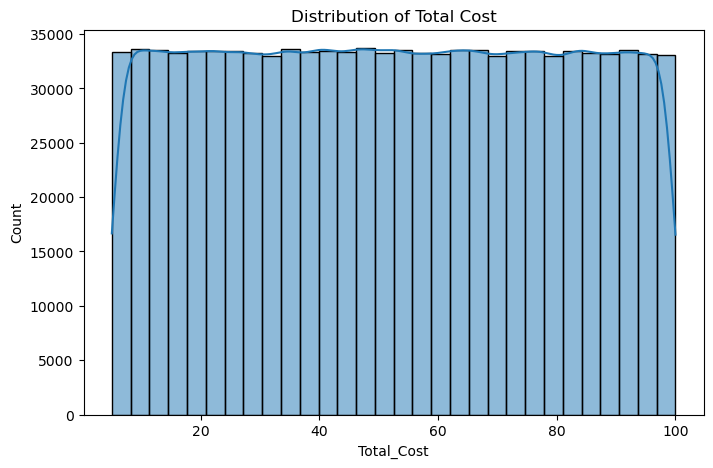

In [34]:
# Visualizing the distribution of 'Total_Cost' using a histogram
plt.figure(figsize=(8, 5))
sns.histplot(customer_data_encoded['Total_Cost'], bins=30, kde=True)
plt.title('Distribution of Total Cost')
plt.show()

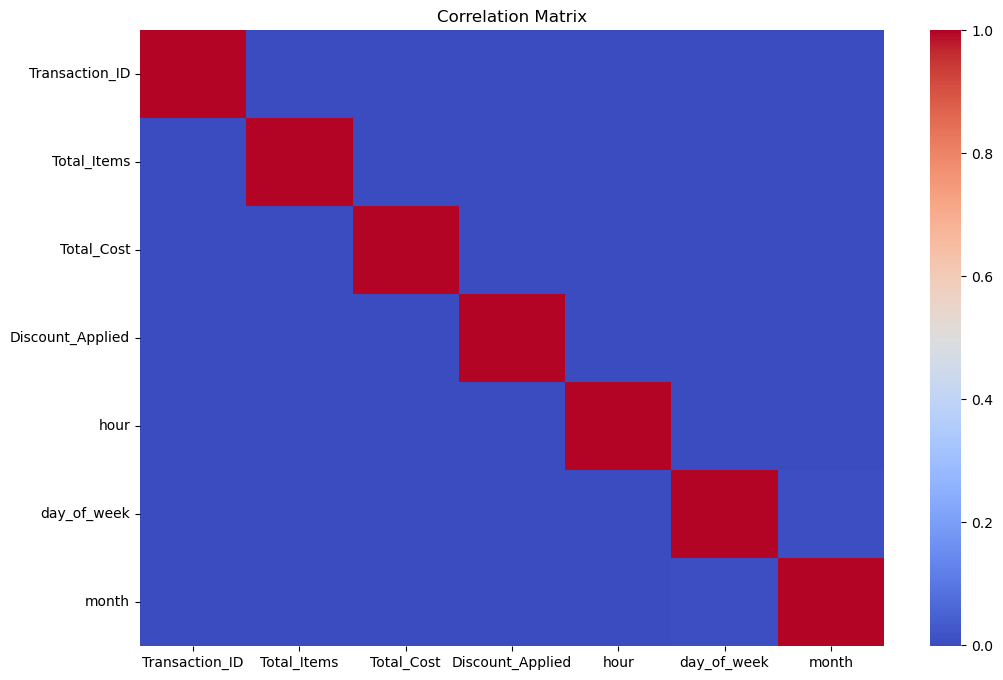

In [54]:
# Drop non-numeric columns before computing the correlation matrix
numeric_columns = customer_data_encoded.select_dtypes(include=[np.number])

# Visualize the correlation matrix using only the numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [58]:
# Step 4: Feature Scaling
# Standardizing the features to have a mean of 0 and a variance of 1 for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_encoded.drop(columns=['Transaction_ID', 'Date', 'Customer_Name', 'Product']))
scaled_features

array([[-0.86916533,  0.70010566,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-1.21739685, -0.96747435,  0.99979202, ..., -0.57676676,
        -0.57698538, -0.70716512],
       [ 0.17552923, -0.39994274,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       ...,
       [-0.86916533,  0.30217701, -1.00020802, ..., -0.57676676,
         1.73314616, -0.70716512],
       [-0.86916533, -1.05683504,  0.99979202, ..., -0.57676676,
         1.73314616, -0.70716512],
       [ 0.87199227, -0.30401677, -1.00020802, ..., -0.57676676,
        -0.57698538,  1.4140969 ]])

In [60]:
# Step 5: Clustering using KMeans
# Using the Elbow Method to determine the optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

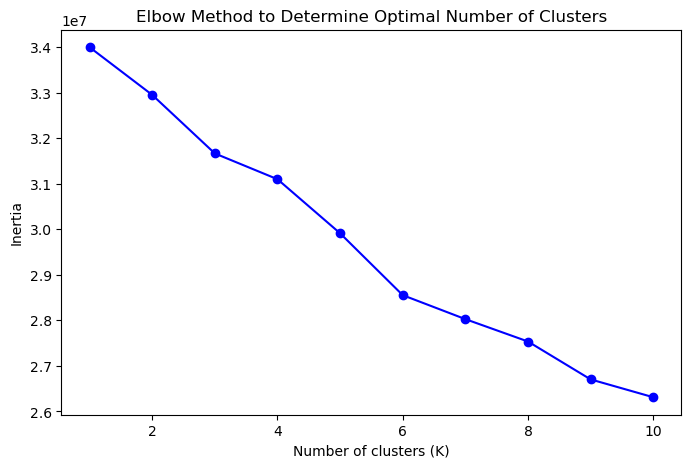

In [61]:
# Plot the Elbow Curve to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [66]:
# Step 6: Applying KMeans Clustering
# Based on the Elbow Method, we will choose the optimal number of clusters (let's assume 4 clusters)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data_encoded['Cluster'] = kmeans.fit_predict(scaled_features)
customer_data_encoded['Cluster']


0         1
1         2
2         1
3         1
4         1
         ..
999995    1
999996    2
999997    1
999998    0
999999    2
Name: Cluster, Length: 1000000, dtype: int32

In [ ]:
# Step 7: Analyzing the Clusters
# Let's take a look at the average values of each feature in each cluster
cluster_analysis = customer_data_encoded.groupby('Cluster').mean()
cluster_analysis

In [ ]:
# Step 8: Visualizing the Cluster Distributions
# Visualizing clusters using a pairplot (for visualizing clusters on certain features)
sns.pairplot(customer_data_encoded, hue='Cluster', vars=['Total_Items', 'Total_Cost', 'Discount_Applied'])
plt.show()

In [ ]:
# Step 9: Providing Insights
# Analyze each cluster and provide insights on customer behavior
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Insights:")
    print(cluster_analysis.loc[cluster])

# Insights Example:
# - Cluster 0: Customers tend to purchase high-cost items and often buy in bulk.
# - Cluster 1: Customers who prefer cash payments and mostly shop at specialty stores.
# - Cluster 2: Young adults who buy fewer items per transaction but take advantage of promotions.

# Step 10: Recommendations for Marketing Strategy
# Based on the insights, suggest marketing strategies:
# 1. Target Cluster 0 customers with bulk purchase offers and premium loyalty programs.
# 2. For Cluster 1, promote cash discount schemes to retain their engagement with specialty stores.
# 3. Cluster 2 should receive promotional offers like "BOGO" or limited-time discounts to encourage repeat purchases.

# Conclusion: The clustering model successfully segmented customers into 4 distinct groups, each with unique purchasing behavior. These insights can help in tailoring marketing campaigns, improving engagement, and optimizing product offerings.